In [1]:
# Import the packages
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Set the start data and the end date
start_date = '2014-01-01'
end_date = '2018-12-01'

# Create the dataframe to store the prices
data = pd.DataFrame()
data['tcs_close_prices'] = yf.download('TCS.NS', start_date, end_date)['Adj Close']
data['nifty_close_prices'] = yf.download('^NSEI', start_date, end_date)['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


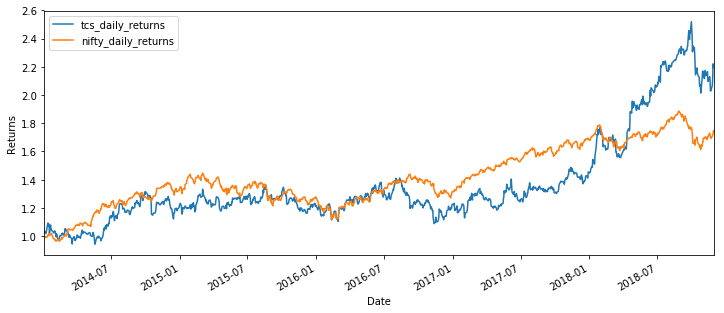

In [3]:
# Calculate the percentage change
data['tcs_daily_returns'] = data.tcs_close_prices.pct_change()
data['nifty_daily_returns'] = data.nifty_close_prices.pct_change()
data = data.dropna()

# Define the figure size for the plot
plt.figure(figsize=(12,5))

# Plot the cumulative returns
(data.tcs_daily_returns+1).cumprod().plot()
(data.nifty_daily_returns+1).cumprod().plot()

# Define the labels for x-axis and y-axis
plt.ylabel('Returns')
plt.xlabel('Date')

plt.legend()

plt.show()

In [4]:
# A function that returns beta after running a OLS on X and Y
def regression(x,y):        
    model = sm.OLS(y,x).fit()    
    return model.params[0]

beta = regression(data.nifty_daily_returns, data.tcs_daily_returns)
'The beta of TCS is ' + str(beta)

'The beta of TCS is 0.5389842253813397'

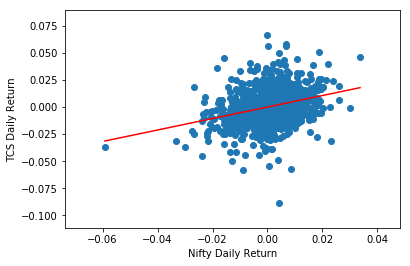

In [5]:
X2 = np.linspace(data.nifty_daily_returns.min(), data.nifty_daily_returns.max(), 100)
Y2 = X2 * 0.53

plt.scatter(data.nifty_daily_returns, data.tcs_daily_returns) 
plt.xlabel("Nifty Daily Return")
plt.ylabel("TCS Daily Return")

 # Add the regression line, colored in red
plt.plot(X2, Y2, 'r')
plt.show()